In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [2]:
annthyroid = pd.read_csv(r"C:\Users\purav\OneDrive\Desktop\Comparative Evaluation of Anomaly Detection Algorithms\Comparative-Evaluation-of-Anomaly-Detection-Algorithms\Datasets\annthyroid-unsupervised-ad.csv", header = None)

In [3]:
annthyroid

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.45,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.06100,0.0060,0.023,0.087,0.026,o
1,0.61,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.02900,0.0150,0.061,0.096,0.064,o
2,0.16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.02900,0.0190,0.058,0.103,0.056,o
3,0.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.11400,0.0030,0.024,0.061,0.039,o
4,0.75,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.04900,0.0030,0.005,0.116,0.004,o
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,0.65,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00047,0.0080,0.154,0.075,0.204,n
6912,0.77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00006,0.0206,0.125,0.107,0.117,n
6913,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00130,0.0250,0.125,0.114,0.109,n
6914,0.64,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00078,0.0206,0.106,0.088,0.121,n


In [4]:
shuffled_df = annthyroid.sample(frac=1).reset_index(drop=True)
shuffled_df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00190,0.0200,0.097,0.088,0.110,n
1,0.56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00010,0.0150,0.108,0.081,0.133,n
2,0.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00087,0.0180,0.110,0.089,0.124,n
3,0.76,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00550,0.0130,0.128,0.104,0.121,n
4,0.17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.00100,0.0150,0.103,0.088,0.117,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,0.63,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00200,0.0201,0.087,0.073,0.119,n
6912,0.73,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00189,0.0206,0.091,0.080,0.113,n
6913,0.51,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00190,0.0220,0.074,0.091,0.081,n
6914,0.49,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00200,0.0208,0.079,0.087,0.091,n


In [5]:
df = pd.DataFrame(shuffled_df.iloc[:, :-1].values)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df))

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-0.109474,1.500509,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.093186,-0.024720,-0.395975,-0.507154,-0.138440
1,0.207733,-0.666440,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.203567,-0.692965,-0.083514,-0.873153,0.514677
2,0.736412,-0.666440,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.156348,-0.292018,-0.026703,-0.454868,0.259110
3,1.265092,-0.666440,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,0.127575,-0.960263,0.484596,0.329416,0.173920
4,-1.854116,1.500509,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,4.370887,-0.148376,-0.692965,-0.225542,-0.507154,0.060335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,0.577809,1.500509,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.087054,-0.011355,-0.680030,-1.291438,0.117127
6912,1.106488,1.500509,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.093799,0.055469,-0.566408,-0.925438,-0.053251
6913,-0.056607,1.500509,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,8.298107,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.093186,0.242578,-1.049302,-0.350297,-0.961937
6914,-0.162342,1.500509,-0.394405,-0.125951,-0.11547,-0.199609,-0.106803,-0.120509,-0.130609,-0.258756,...,-0.114825,-0.09276,-0.161594,-0.012026,-0.228787,-0.087054,0.082199,-0.907274,-0.559439,-0.677973


In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA()
pca.fit(df)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(num_components)

19


In [11]:
pca = PCA(n_components=19)
new_df = pca.fit_transform(df)

In [12]:
new_df

array([[-0.79652285, -0.47566053, -0.93189157, ...,  0.91034298,
         0.53314865, -0.14427435],
       [-0.38554877, -0.78901059,  0.13586928, ..., -0.25725743,
        -0.3541696 ,  0.84856383],
       [-0.24734797, -0.5668193 ,  0.27929017, ..., -0.42815746,
        -0.00222998,  0.42547732],
       ...,
       [-1.50313053,  0.59049969,  0.03438918, ...,  0.35368322,
         1.98895812, -0.36879473],
       [-1.29117403, -0.11888652, -0.98028104, ...,  0.97425229,
         0.39840495, -0.26389974],
       [-1.16484463,  0.11971738, -1.28167625, ...,  1.30560265,
        -0.09678957,  0.05673213]])

In [13]:
df = pd.DataFrame(new_df)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,-0.796523,-0.475661,-0.931892,0.127710,-0.193227,0.157553,-0.176523,-0.206155,-0.181200,0.069568,-0.236327,-0.096792,-0.205257,-0.022892,0.072475,-0.218874,0.910343,0.533149,-0.144274
1,-0.385549,-0.789011,0.135869,0.283397,0.071792,-0.288559,-0.310433,-0.048464,-0.050997,-0.375475,0.198894,-0.104325,0.259666,0.372306,-0.346635,-0.042553,-0.257257,-0.354170,0.848564
2,-0.247348,-0.566819,0.279290,0.366128,0.084386,-0.371449,-0.089965,-0.051083,-0.046074,-0.281388,0.105384,-0.280131,0.357794,0.532439,-0.398946,-0.133940,-0.428157,-0.002230,0.425477
3,-0.176655,-0.346056,0.742239,0.354185,0.323614,-0.509449,0.168659,-0.037523,0.007000,-0.301798,-0.058516,-0.591470,0.507556,0.785674,-0.484718,0.065987,-0.655198,0.376419,-0.011003
4,-0.751501,-0.195013,-3.190974,-2.230808,-0.364930,0.214680,0.062480,0.380085,-0.478831,0.124620,-1.744056,1.153803,-0.107579,-0.986582,-0.097930,1.489871,-0.960621,-0.688995,0.037800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6911,-1.177495,-1.164903,-0.799131,0.376056,-0.312044,0.109158,-0.236357,-0.248670,-0.356507,0.016332,-0.066999,-0.095273,-0.240480,0.077433,0.016077,0.036845,0.691999,0.796154,0.106684
6912,-1.122920,-1.064207,-0.605572,0.469991,-0.256391,0.012793,-0.038885,-0.264993,-0.362031,0.090636,-0.124604,-0.274311,-0.150408,0.229718,-0.123430,0.041939,0.513572,1.091983,-0.260026
6913,-1.503131,0.590500,0.034389,0.143978,-0.207101,0.094776,-4.754811,4.701337,1.718773,3.991648,-0.322953,-0.253472,-0.954121,-0.990621,-0.991365,-0.079068,0.353683,1.988958,-0.368795
6914,-1.291174,-0.118887,-0.980281,0.138858,-0.274658,0.192206,-0.187293,-0.225412,-0.205420,0.091587,-0.209478,-0.060848,-0.228821,-0.082465,0.010579,-0.297726,0.974252,0.398405,-0.263900


Base Case of Algorithms

In [14]:
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.cof import COF
from pyod.models.knn import KNN

In [16]:
y = shuffled_df.iloc[:,-1]
y = pd.DataFrame(y.replace({'o':1, 'n':0}))

In [17]:
y

,21
0,0
1,0
2,0
3,0
4,0
...,...
6911,0
6912,0
6913,0
6914,0


Performance over multiple parameters

c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\purav\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

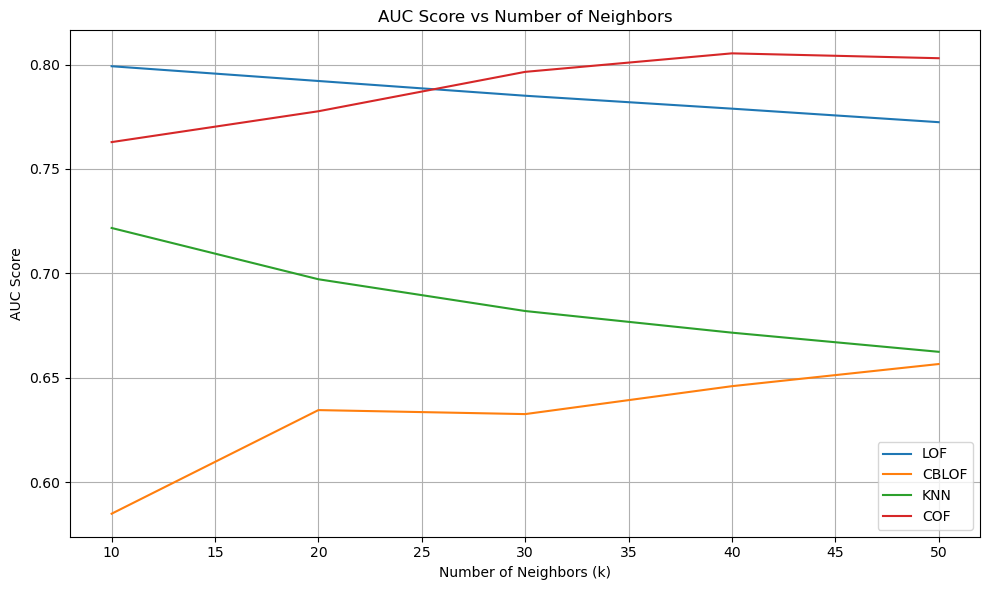

In [19]:
auc_scores_lof = []
auc_scores_cblof = []
auc_scores_knn = []
auc_scores_cof = []
n_neighbors_list = [10,20,30,40,50]
accuracy_scores_lof = []
accuracy_scores_cblof = []
accuracy_scores_knn = []
accuracy_scores_cof = []

# Evaluate AUC scores for LOF, CBLOF, and KNN over multiple neighbors
for n_neighbors in n_neighbors_list:
    # LOF
    lof_model = LOF(n_neighbors=n_neighbors)
    lof_model.fit(df)
    y_scores_lof = lof_model.decision_function(df)
    lof_pred = lof_model.labels_
    auc_lof = roc_auc_score(y, y_scores_lof)

    auc_scores_lof.append(auc_lof)
    accuracy_lof = accuracy_score(y, lof_pred)
    accuracy_scores_lof.append(accuracy_lof)

    cof_model = COF(n_neighbors=n_neighbors)
    cof_model.fit(df)
    y_scores_cof = cof_model.decision_function(df)
    cof_pred = cof_model.labels_
    auc_cof = roc_auc_score(y, y_scores_cof)

    auc_scores_cof.append(auc_cof)
    accuracy_cof = accuracy_score(y, cof_pred)
    accuracy_scores_cof.append(accuracy_cof)


    # CBLOF
    cblof_model = CBLOF(n_clusters=n_neighbors)
    cblof_model.fit(df)
    y_scores_cblof = cblof_model.decision_function(df)
    cblof_pred = cblof_model.labels_
    auc_cblof = roc_auc_score(y, y_scores_cblof)

    auc_scores_cblof.append(auc_cblof)
    accuracy_cblof = accuracy_score(y, cblof_pred)
    accuracy_scores_cblof.append(accuracy_cblof)
    
    # KNN
    knn_model = KNN(n_neighbors=n_neighbors)
    knn_model.fit(df)
    y_scores_knn = knn_model.decision_function(df)
    knn_pred = knn_model.labels_
    auc_knn = roc_auc_score(y, y_scores_knn)

    auc_scores_knn.append(auc_knn)
    accuracy_knn = accuracy_score(y, knn_pred)
    accuracy_scores_knn.append(accuracy_knn)

# Calculate mean AUC score for each model
mean_auc_lof = np.mean(auc_scores_lof)
mean_auc_cblof = np.mean(auc_scores_cblof)
mean_auc_knn = np.mean(auc_scores_knn)
mean_auc_cof = np.mean(auc_scores_cof)
mean_acc_lof = np.mean(accuracy_scores_lof)
mean_acc_cblof = np.mean(accuracy_scores_cblof)
mean_acc_knn = np.mean(accuracy_scores_knn)
mean_acc_cof = np.mean(accuracy_scores_cof)
plt.figure(figsize=(10, 6))

# Plot LOF AUC
plt.plot(n_neighbors_list, auc_scores_lof, label='LOF')

# Plot CBLOF AUC
plt.plot(n_neighbors_list, auc_scores_cblof, label='CBLOF')

# Plot KNN AUC
plt.plot(n_neighbors_list, auc_scores_knn, label='KNN')

plt.plot(n_neighbors_list, auc_scores_cof, label='COF')

# Add labels and title
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('AUC Score')
plt.title('AUC Score vs Number of Neighbors')
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
print("KNN auc",mean_auc_knn)
print("LOF auc",mean_auc_lof)
print("CBLOF auc",mean_auc_cblof)
print("COF auc",mean_auc_cof)

print("KNN acc",mean_acc_knn)
print("LOF acc",mean_acc_lof)
print("CBLOF acc",mean_acc_cblof)
print("COF acc",mean_acc_cof)



KNN auc 0.6869677767776778
LOF auc 0.7855455145514553
CBLOF auc 0.6308816081608161
COF auc 0.7890909090909092
KNN acc 0.8813765182186234
LOF acc 0.8935222672064779
CBLOF acc 0.8807403123192596
COF acc 0.8903990746096009
